# Weather Forecasting Model for Predicting Rain

**Name:** Anandakishore M

**Organization:** Entri Elevate

**Date:** 

#### Overview of Problem Statement:

Accurate weather forecasting is essential for various sectors, including agriculture, transportation, and disaster management. Predicting whether it will rain tomorrow is particularly challenging due to the complex interactions of atmospheric variables such as temperature, humidity, wind speed, and pressure. An effective prediction model can provide crucial information that helps in planning and decision-making, reducing the impact of adverse weather conditions, and optimizing resource use in weather-dependent industries.

#### Objective:

To develop a reliable machine learning model for accurately predicting whether it will rain tomorrow, using advanced data analysis and atmospheric variables.

Target:
    
    RainTomorrow: The target variable, indicating whether it will rain tomorrow (Yes or No). This is a binary classification problem where the model needs to predict one of two possible outcomes: rain or no rain.

Types of Classification:
    
    Binary Classification: The model is designed to predict one of two outcomes: either it will rain tomorrow (Yes) or it will not (No).

#### Data Description:

- **Source:** [Kaggle](https://www.kaggle.com/datasets/rever3nd/weather-data/data)
  
- **Features:**
  - **Date:** The specific day on which the weather observations were recorded.
  - **Location:** The name of the location where the weather data was collected.
  - **MinTemp:** The minimum temperature recorded on that day (in degrees Celsius).
  - **MaxTemp:** The maximum temperature recorded on that day (in degrees Celsius).
  - **Rainfall:** The amount of rain recorded for the day (in millimeters).
  - **WindGustDir:** The direction of the strongest wind gust recorded during the day.
  - **WindGustSpeed:** The speed of the strongest wind gust recorded during the day (in km/h).
  - **WindDir9am:** The direction of the wind at 9 AM.
  - **WindDir3pm:** The direction of the wind at 3 PM.
  - **WindSpeed9am:** The wind speed at 9 AM (in km/h).
  - **WindSpeed3pm:** The wind speed at 3 PM (in km/h).
  - **Humidity9am:** The humidity level at 9 AM (as a percentage).
  - **Humidity3pm:** The humidity level at 3 PM (as a percentage).
  - **Pressure9am:** The atmospheric pressure at 9 AM (in hPa).
  - **Pressure3pm:** The atmospheric pressure at 3 PM (in hPa).
  - **Cloud9am:** The cloud cover at 9 AM (on a scale of 0 to 8).
  - **Cloud3pm:** The cloud cover at 3 PM (on a scale of 0 to 8).
  - **Temp9am:** The temperature at 9 AM (in degrees Celsius).
  - **Temp3pm:** The temperature at 3 PM (in degrees Celsius).
  - **RainToday:** Indicates whether it rained today (`Yes` or `No`).
  - **RISK_MM:** The amount of rain expected for the next day (in millimeters).
  - **RainTomorrow:** The target variable, indicating whether it will rain tomorrow (`Yes` or `No`).


#### Data Collection:


In [92]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
df = pd.read_csv("weather.csv")
df.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25000 non-null  int64  
 1   Date           25000 non-null  object 
 2   Location       25000 non-null  object 
 3   MinTemp        24669 non-null  float64
 4   MaxTemp        24824 non-null  float64
 5   Rainfall       24721 non-null  float64
 6   Evaporation    9432 non-null   float64
 7   Sunshine       6664 non-null   float64
 8   WindGustDir    21543 non-null  object 
 9   WindGustSpeed  21545 non-null  float64
 10  WindDir9am     21928 non-null  object 
 11  WindDir3pm     23267 non-null  object 
 12  WindSpeed9am   24428 non-null  float64
 13  WindSpeed3pm   23770 non-null  float64
 14  Humidity9am    24609 non-null  float64
 15  Humidity3pm    23936 non-null  float64
 16  Pressure9am    20172 non-null  float64
 17  Pressure3pm    20173 non-null  float64
 18  Cloud9

In [4]:
df.describe()

Unnamed: 0       MinTemp       MaxTemp      Rainfall  Evaporation  \
count  25000.000000  24669.000000  24824.000000  24721.000000  9432.000000   
mean   12499.500000     13.294568     23.990558      2.674467     5.825138   
std     7217.022701      5.848304      6.114348      9.720306     4.871567   
min        0.000000     -3.300000      6.800000      0.000000     0.000000   
25%     6249.750000      8.900000     19.500000      0.000000     3.000000   
50%    12499.500000     14.000000     23.400000      0.000000     4.800000   
75%    18749.250000     17.900000     27.700000      0.600000     7.200000   
max    24999.000000     29.700000     47.300000    371.000000    86.200000   

          Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  6664.000000   21545.000000  24428.000000  23770.000000  24609.000000   
mean      7.811945      37.772755     12.686917     16.837106     69.822951   
std       3.718698      13.212331      9.136115      9.095719     17.755908   
min       0.000000       7.000000      0.000000      0.000000      3.000000   
25%       5.500000      28.000000      6.000000      9.000000     58.000000   
50%       8.900000      35.000000     11.000000     17.000000     71.000000   
75%      10.600000      46.000000     19.000000     22.000000     83.000000   
max      14.000000     135.000000    130.000000     83.000000    100.000000   

        Humidity3pm   Pressure9am   Pressure3pm      Cloud9am      Cloud3pm  \
count  23936.000000  20172.000000  20173.000000  14136.000000  13815.000000   
mean      52.762826   1018.173290   1015.627438      4.251556      4.409265   
std       21.210121      6.481112      6.394829      2.968785      2.719235   
min        1.000000    980.500000    979.000000      0.000000      0.000000   
25%       37.000000   1013.800000   1011.300000      1.000000      2.000000   
50%       54.000000   1018.200000   1015.700000      5.000000      5.000000   
75%       68.000000   1022.600000   1020.000000      7.000000      7.000000   
max      100.000000   1039.900000   1036.800000      8.000000      8.000000   

            Temp9am       Temp3pm       RISK_MM  
count  24755.000000  24082.000000  25000.000000  
mean      17.953084     22.507171      2.677376  
std        5.394685      5.954540      9.705604  
min        0.300000      6.400000      0.000000  
25%       14.200000     18.100000      0.000000  
50%       18.400000     21.900000      0.000000  
75%       21.900000     26.100000      0.800000  
max       37.700000     46.700000    371.000000

The dataset includes 25,000 records with features like temperature, rainfall, wind speed, humidity, and cloud cover. The dataset reflects diverse weather conditions, with significant variability in key features. These patterns will guide the development of a predictive model to forecast rain, focusing on the influence of temperature, wind, humidity, and pressure.


#### Data Preprocessing - Data Cleaning:

In [5]:
df.isnull().sum()

Unnamed: 0           0
Date                 0
Location             0
MinTemp            331
MaxTemp            176
Rainfall           279
Evaporation      15568
Sunshine         18336
WindGustDir       3457
WindGustSpeed     3455
WindDir9am        3072
WindDir3pm        1733
WindSpeed9am       572
WindSpeed3pm      1230
Humidity9am        391
Humidity3pm       1064
Pressure9am       4828
Pressure3pm       4827
Cloud9am         10864
Cloud3pm         11185
Temp9am            245
Temp3pm            918
RainToday          279
RISK_MM              0
RainTomorrow         0
dtype: int64

The dataset contains 25,000 weather records, but there are missing values across several features and the Unnamed: 0 column appears to be an index and isn't useful for analysis, with the most significant gaps in Evaporation with 62.272 percentage null values ,and  Sunshine with 73.344 percentage null values making them candidates for removal due to insufficient data. Key variables like temperature, rainfall, wind speed, and humidity also have some missing entries. Despite these gaps, the dataset provides sufficient information to build a predictive model for forecasting rain, focusing on the influence of available weather features.

In [6]:
df.drop('Unnamed: 0',axis=1, inplace = True)

In [7]:
dfd=df #duplicting the dataset

In [8]:
dfd.drop(columns=['Sunshine', 'Evaporation'], axis=1, inplace=True)
dfd.shape

(25000, 22)

In [9]:
dfd.nunique()

Date             3040
Location            9
MinTemp           321
MaxTemp           376
Rainfall          436
WindGustDir        16
WindGustSpeed      58
WindDir9am         16
WindDir3pm         16
WindSpeed9am       39
WindSpeed3pm       39
Humidity9am        97
Humidity3pm       100
Pressure9am       414
Pressure3pm       414
Cloud9am            9
Cloud3pm            9
Temp9am           339
Temp3pm           371
RainToday           2
RISK_MM           436
RainTomorrow        2
dtype: int64

<AxesSubplot:>

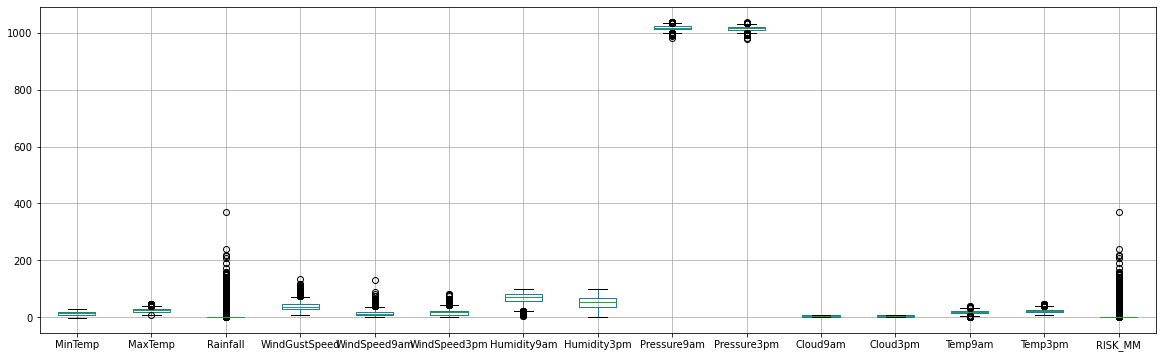

In [10]:
#checking for outliers using box plot 
dfd.boxplot(figsize=(20,6))

In [11]:
num_c = list(dfd.select_dtypes(include='number'))
print(num_c)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [12]:
obj_c=list(dfd.select_dtypes(include='object'))
print(obj_c)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
#imputing with mean values for columns without outliers and median for columns with outliers 
#and mode for categorical variables 
mean_imp= ['MinTemp','Humidity3pm', 'Cloud9am', 'Cloud3pm']
median_imp=['MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am',
 'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
mode_imp=['WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [14]:
# Mean Imputation
dfd[mean_imp] = dfd[mean_imp].apply(lambda x: x.fillna(x.mean()))
# Median Imputation
dfd[median_imp] = dfd[median_imp].apply(lambda x: x.fillna(x.median()))
# Mode Imputation
dfd[mode_imp] = dfd[mode_imp].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [15]:
dfd.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In this data imputation process, missing values are handled using different strategies based on the column characteristics. Columns without outliers are filled with mean values, those with outliers are imputed with median values, and categorical variables are filled with the most frequent value (mode). This approach ensures a more accurate and robust dataset for analysis and modeling.

In [16]:
#Treating the outliers with iqr method
num_cols=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
          'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']
cat_cols=['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [17]:
iqr_values = {}
for col in num_cols:
    q1 = np.percentile(dfd[col], 25)
    q3 = np.percentile(dfd[col], 75)
    iqr = q3 - q1
    iqr_values[col] = iqr

In [18]:
outliers = {}
for col in num_cols:
    q1 = np.percentile(dfd[col], 25)
    q3 = np.percentile(dfd[col], 75)
    iqr = iqr_values[col]
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = dfd[(dfd[col] < lower_bound) | (dfd[col] > upper_bound)]
    dfd = dfd[(dfd[col] >= lower_bound) & (dfd[col] <= upper_bound)]

<AxesSubplot:>

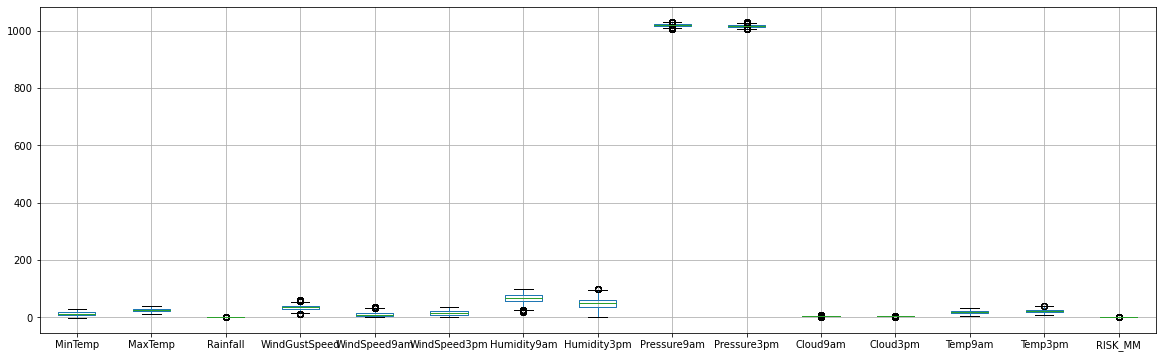

In [19]:
dfd.boxplot(figsize=(20,6))

After treating the outliers using the Interquartile Range (IQR) method, the dataset is now more refined. The IQR method has been applied to identify and handle extreme values by filtering out data points outside the range defined by the first and third quartiles. 

In [20]:
dfd.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [21]:
# Convert date column to datetime
dfd['Date'] = pd.to_datetime(dfd['Date'])
dfd['Date'].dtypes

dtype('<M8[ns]')

#### Exploratory Data Analysis (EDA):

In [22]:
dfd_corr=dfd[num_cols].corr()
dfd_corr

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.684605  0.074709       0.311661      0.301018   
MaxTemp        0.684605  1.000000 -0.098525       0.204862      0.083011   
Rainfall       0.074709 -0.098525  1.000000       0.054150      0.058729   
WindGustSpeed  0.311661  0.204862  0.054150       1.000000      0.456224   
WindSpeed9am   0.301018  0.083011  0.058729       0.456224      1.000000   
WindSpeed3pm   0.240708  0.032603  0.076834       0.637545      0.366373   
Humidity9am   -0.144954 -0.277507  0.136759      -0.342803     -0.420363   
Humidity3pm    0.185456 -0.373366  0.158669      -0.085675     -0.051668   
Pressure9am   -0.379564 -0.365830 -0.045518      -0.349746     -0.112016   
Pressure3pm   -0.346351 -0.430602 -0.007830      -0.319619     -0.072827   
Cloud9am       0.011435 -0.092604  0.058337      -0.059354     -0.104380   
Cloud3pm      -0.068518 -0.030740 -0.014536      -0.089619     -0.192887   
Temp9am        0.903175  0.817590 -0.008555       0.332818      0.281778   
Temp3pm        0.639161  0.961465 -0.097385       0.179505      0.088456   
RISK_MM        0.057622 -0.079610  0.115341       0.011992      0.012444   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.240708    -0.144954     0.185456    -0.379564   
MaxTemp            0.032603    -0.277507    -0.373366    -0.365830   
Rainfall           0.076834     0.136759     0.158669    -0.045518   
WindGustSpeed      0.637545    -0.342803    -0.085675    -0.349746   
WindSpeed9am       0.366373    -0.420363    -0.051668    -0.112016   
WindSpeed3pm       1.000000    -0.171365     0.157684    -0.203484   
Humidity9am       -0.171365     1.000000     0.528905     0.185408   
Humidity3pm        0.157684     0.528905     1.000000     0.100258   
Pressure9am       -0.203484     0.185408     0.100258     1.000000   
Pressure3pm       -0.159403     0.184014     0.171240     0.956288   
Cloud9am           0.018138     0.186381     0.155801     0.015385   
Cloud3pm          -0.059061     0.146677     0.094276     0.001435   
Temp9am            0.244280    -0.346345    -0.007640    -0.398167   
Temp3pm           -0.000714    -0.277143    -0.437447    -0.348468   
RISK_MM            0.017616     0.144080     0.217547    -0.007541   

               Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm   RISK_MM  
MinTemp          -0.346351  0.011435 -0.068518  0.903175  0.639161  0.057622  
MaxTemp          -0.430602 -0.092604 -0.030740  0.817590  0.961465 -0.079610  
Rainfall         -0.007830  0.058337 -0.014536 -0.008555 -0.097385  0.115341  
WindGustSpeed    -0.319619 -0.059354 -0.089619  0.332818  0.179505  0.011992  
WindSpeed9am     -0.072827 -0.104380 -0.192887  0.281778  0.088456  0.012444  
WindSpeed3pm     -0.159403  0.018138 -0.059061  0.244280 -0.000714  0.017616  
Humidity9am       0.184014  0.186381  0.146677 -0.346345 -0.277143  0.144080  
Humidity3pm       0.171240  0.155801  0.094276 -0.007640 -0.437447  0.217547  
Pressure9am       0.956288  0.015385  0.001435 -0.398167 -0.348468 -0.007541  
Pressure3pm       1.000000  0.028060 -0.005115 -0.395596 -0.419693  0.001108  
Cloud9am          0.028060  1.000000  0.272714 -0.061320 -0.086597  0.066376  
Cloud3pm         -0.005115  0.272714  1.000000 -0.076664 -0.051942  0.010298  
Temp9am          -0.395596 -0.061320 -0.076664  1.000000  0.770008 -0.008315  
Temp3pm          -0.419693 -0.086597 -0.051942  0.770008  1.000000 -0.096095  
RISK_MM           0.001108  0.066376  0.010298 -0.008315 -0.096095  1.000000

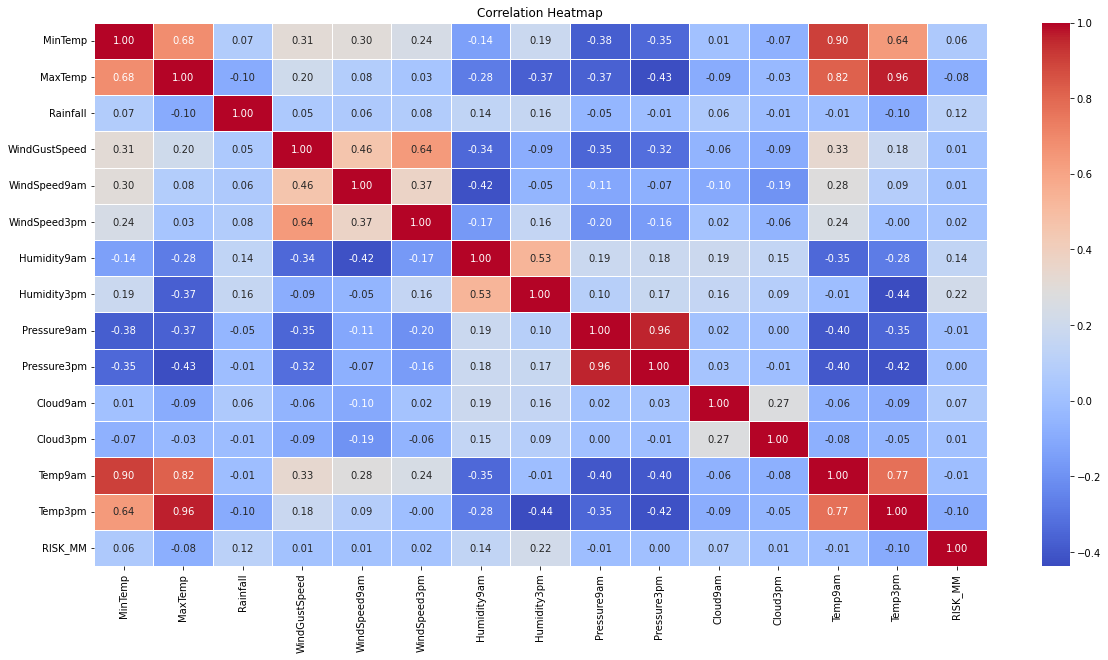

In [23]:
#correlation heatmap
plt.figure(figsize=(20, 10))
# Create a heatmap with the correlation matrix
sns.heatmap(dfd_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

The heatmap reveals the strength and direction of correlations between numerical features in the dataset. Strong correlations (close to +1 or -1) indicate a significant relationship between features, while weak correlations (close to 0) suggest minimal linear relationships. This visualization helps identify which features are strongly associated, guiding feature selection and model building

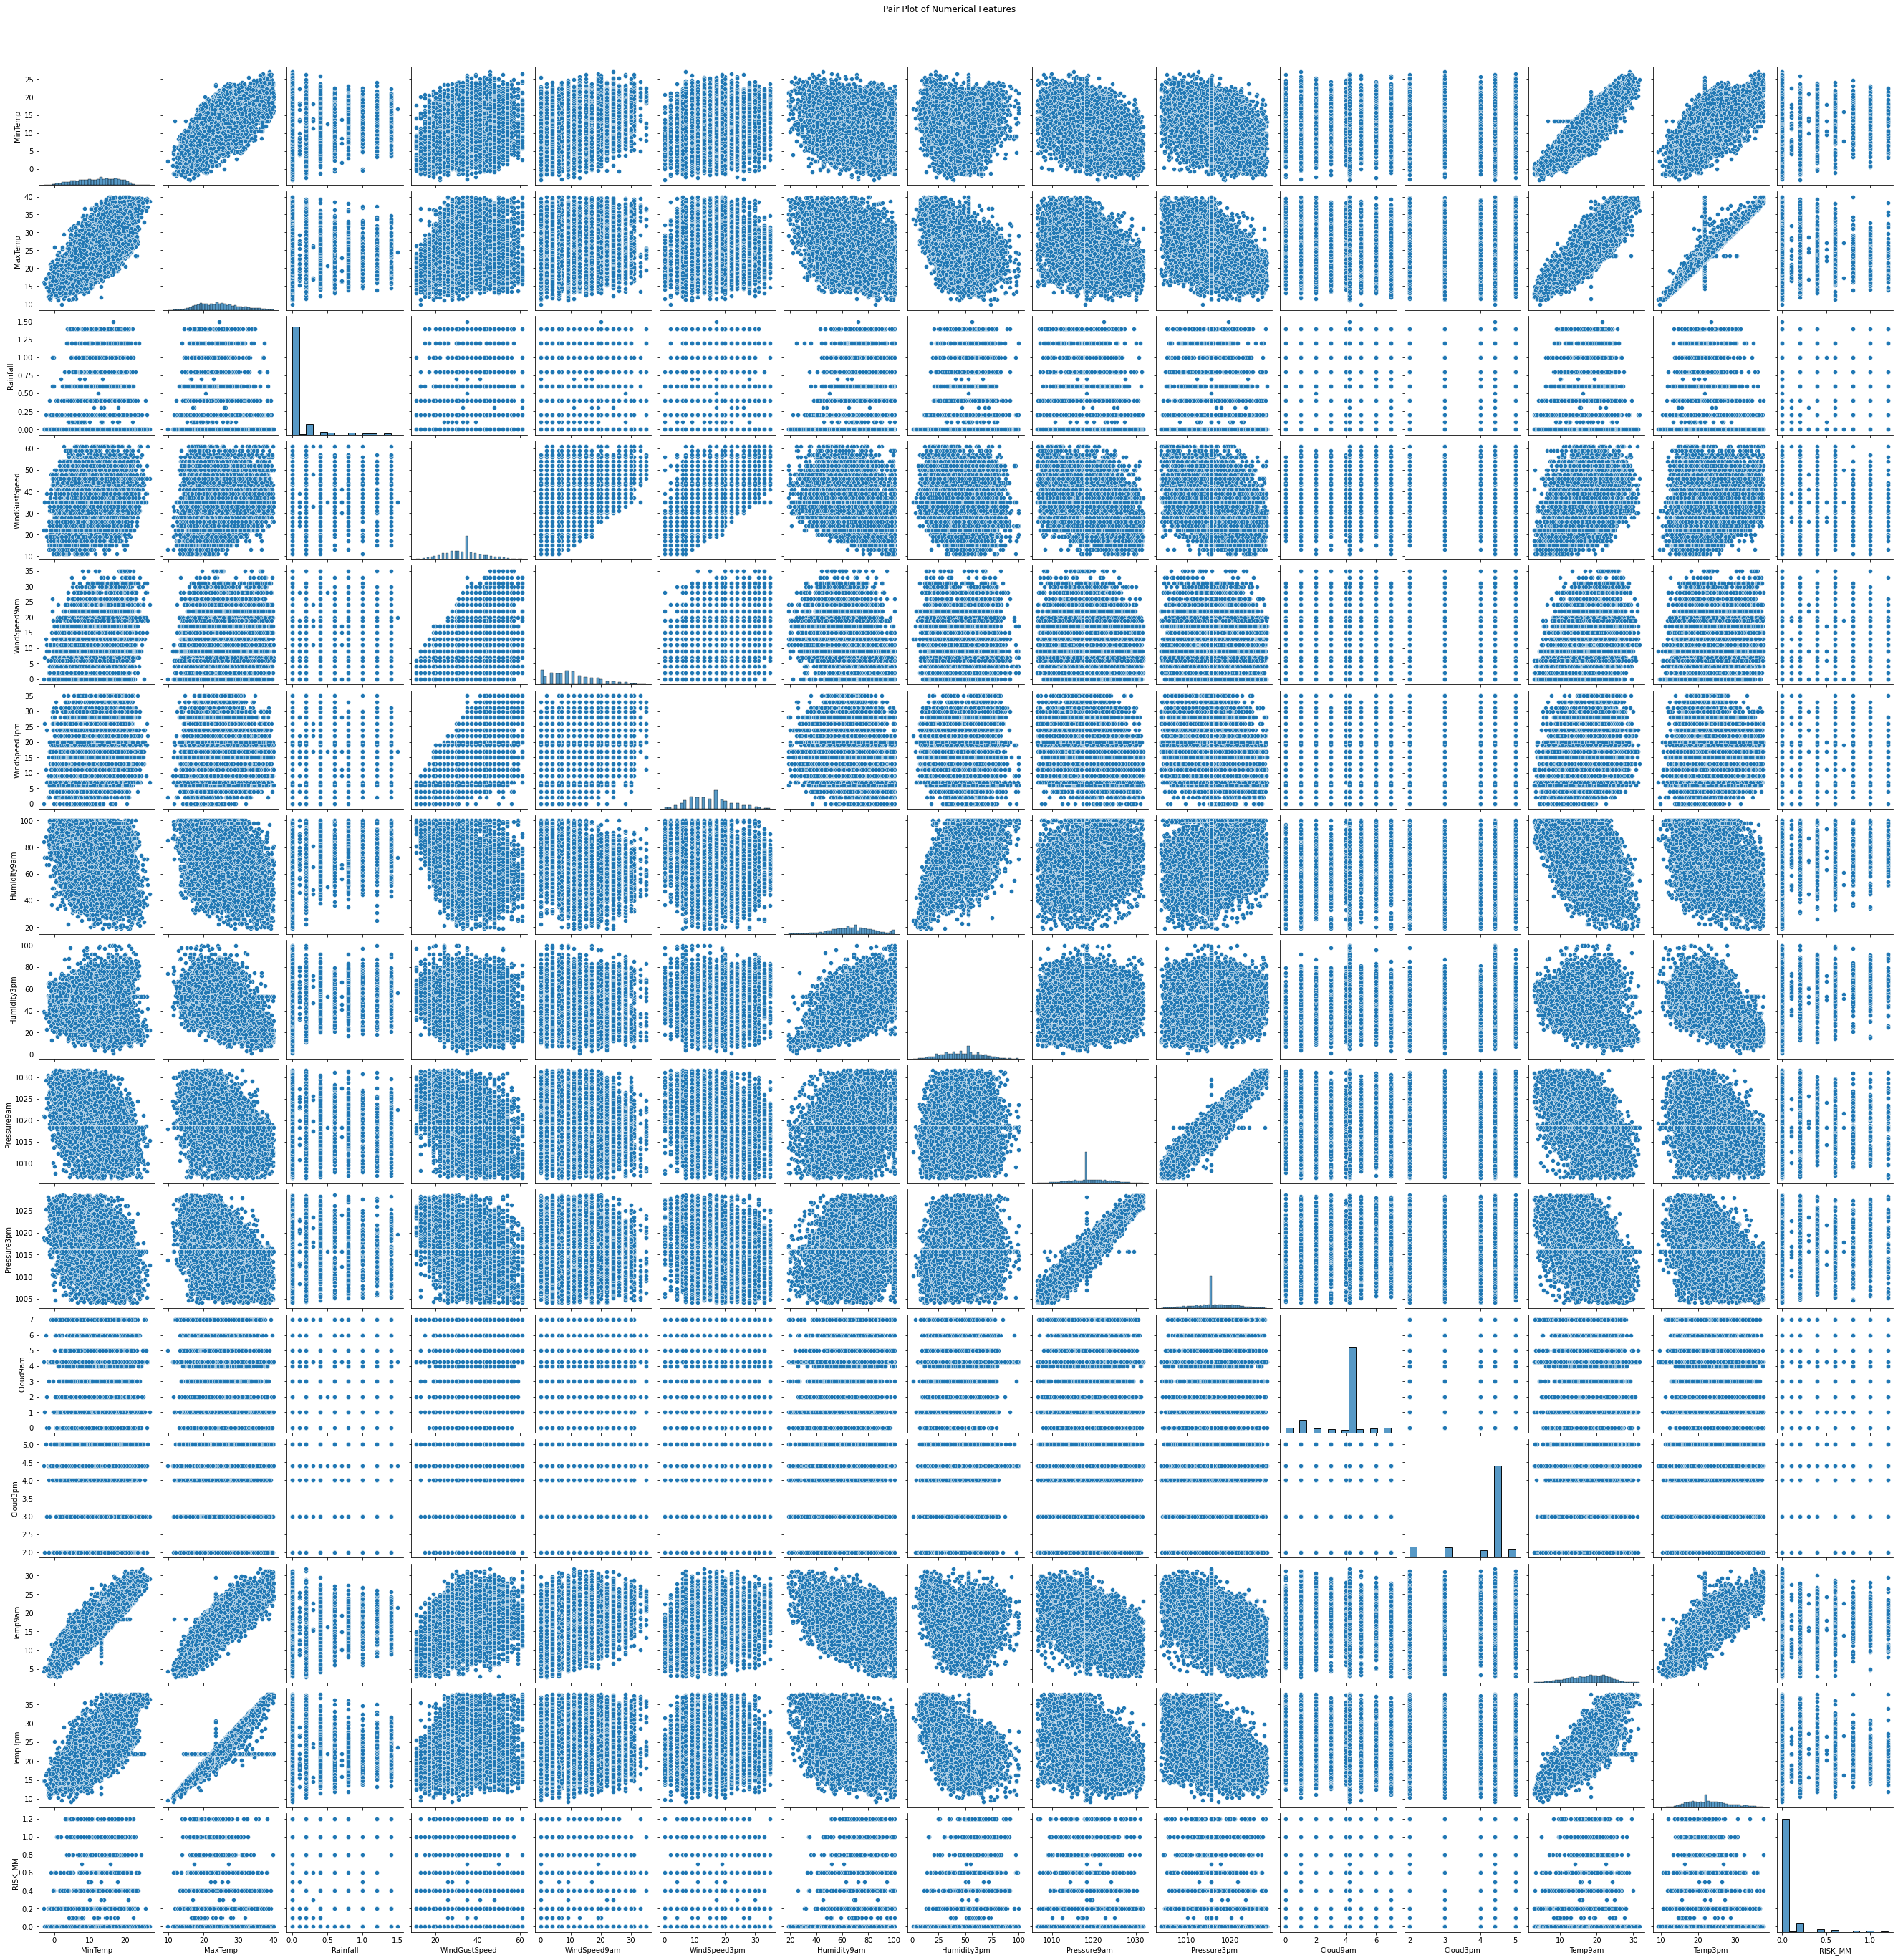

In [24]:
# Plot pair plot for numerical columns
sns.pairplot(dfd[num_c])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

The pair plot displays the pairwise relationships and distributions of numerical features in the dataset. Diagonal plots show the distribution of each feature, while off-diagonal plots reveal correlations between feature pairs. Strong linear relationships or clusters between features can be observed, aiding in understanding feature interactions and potential multicollinearity.

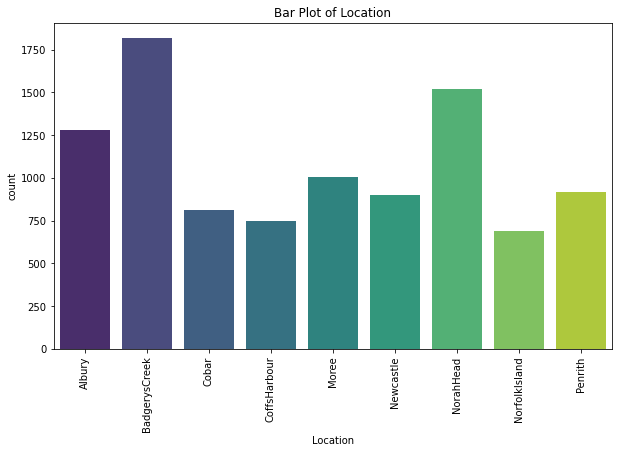

In [25]:
categorical_column = 'Location'

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=dfd, palette='viridis')
plt.title(f'Bar Plot of {categorical_column}')
plt.xticks(rotation=90)
plt.show()

Overall, this bar plot offers a preliminary understanding of rainfall distribution across different locations.BadgerysCreek sees the most rain,while Cobar, Coffs Harbour, NorahHead, Norfolk Island, and Penrith experience less. Other locations have moderate rainfall.

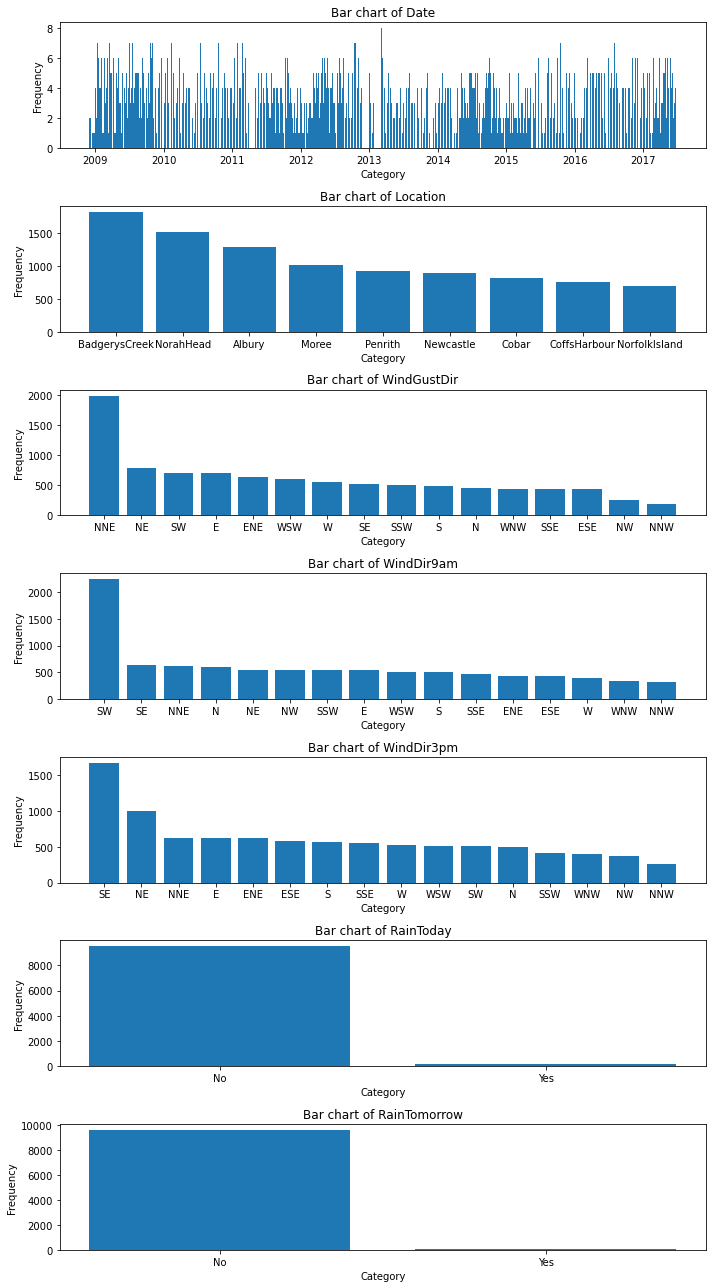

In [26]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 18))
# Iterate over the categorical columns
for i, col in enumerate(cat_cols):
    axs[i].bar(dfd[col].value_counts().index, dfd[col].value_counts().values)
    axs[i].set_title(f"Bar chart of {col}")
    axs[i].set_xlabel("Category")
    axs[i].set_ylabel("Frequency")
    
plt.tight_layout()
plt.show()

The bar charts display the frequency distribution of each categorical feature in the dataset. By visualizing the count of occurrences for each category

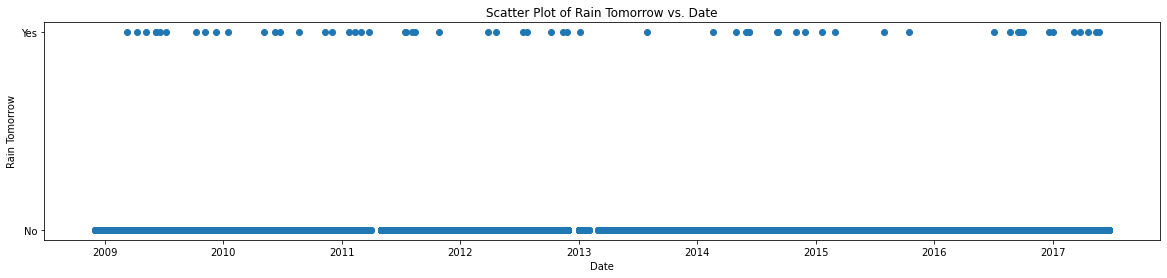

In [27]:
# Scatter plot of 'RainTomorrow' vs. 'Date'
plt.figure(figsize=(20, 4))
plt.scatter(dfd['Date'], dfd['RainTomorrow'])
plt.xlabel('Date')
plt.ylabel('Rain Tomorrow')
plt.title('Scatter Plot of Rain Tomorrow vs. Date')
plt.show()


predicting rainfall based solely on date is challenging; additional factors and longer-term data are needed for more accurate insights. Including day, month, and year as features could enhance the model's ability to predict rainfall by providing more granular temporal information

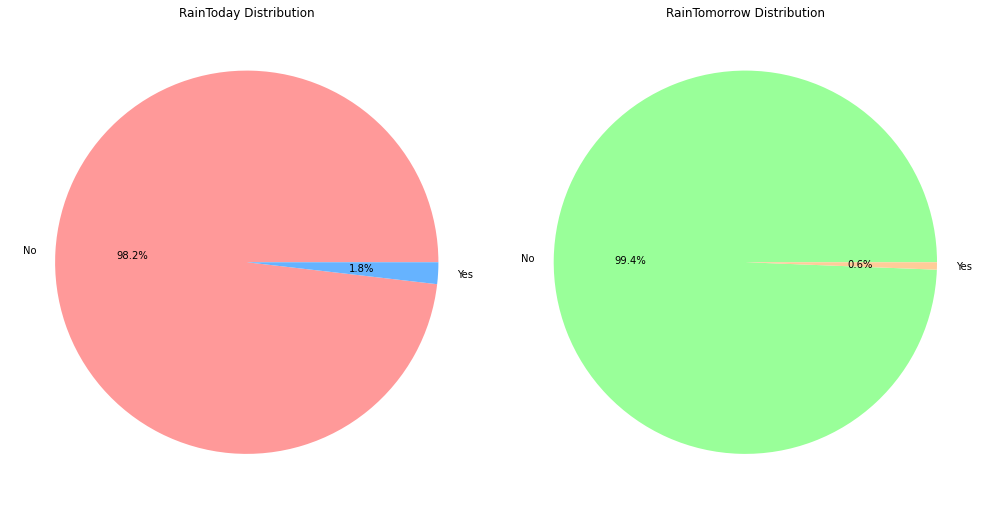

In [28]:
# Prepare data for pie charts
rain_today_counts = dfd['RainToday'].value_counts()
rain_tomorrow_counts = dfd['RainTomorrow'].value_counts()

# Define labels and sizes
labels_today = rain_today_counts.index
sizes_today = rain_today_counts.values
labels_tomorrow = rain_tomorrow_counts.index
sizes_tomorrow = rain_tomorrow_counts.values

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Pie chart for RainToday
axs[0].pie(sizes_today, labels=labels_today, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axs[0].set_title('RainToday Distribution')

# Pie chart for RainTomorrow
axs[1].pie(sizes_tomorrow, labels=labels_tomorrow, autopct='%1.1f%%', colors=['#99ff99','#ffcc99'])
axs[1].set_title('RainTomorrow Distribution')

# Show the plot
plt.tight_layout()
plt.show()

Severe class imbalance.
 Data heavily skewed towards one class. This can bias models. Need to balance classes before modeling.

#### Feature Engineering:

In [29]:
dfe= dfd
dfe.shape

(9690, 22)

In [30]:
# Create new features
# Extract year, month, and day from the 'Date' column
import pandas as pd
dfe['Year'] = pd.to_datetime(dfe['Date']).dt.year
dfe['Month'] = pd.to_datetime(dfe['Date']).dt.month
dfe['Day'] = pd.to_datetime(dfe['Date']).dt.day
# Drop the original 'Date' column if not needed
dfe = dfe.drop(columns=['Date'])
# Check data types
print(dfe.dtypes)

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
Year               int32
Month              int32
Day                int32
dtype: object


To enhance the predictive power of the model, we extracted temporal features from the 'Date' column. Specifically, the 'Date' was decomposed into three separate features: 'Year', 'Month', and 'Day'. This allows the model to capture seasonality, monthly trends, and specific daily patterns that could influence weather conditions. The original 'Date' column was subsequently dropped, simplifying the dataset while retaining the essential temporal information. This step enriches the dataset with meaningful time-based features, which are crucial for accurate weather prediction.

In [31]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()

# Label Encoding
dfe['RainToday'] = label_encoder.fit_transform(dfe['RainToday'])
dfe['RainTomorrow'] = label_encoder.fit_transform(dfe['RainTomorrow'])

# One-Hot Encoding
one_hot_encoded_columns = pd.get_dummies(dfe[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])

# Dropping the original columns after encoding
dfe = dfe.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

# Merging the one-hot encoded columns with the original dataframe
dfe = pd.concat([dfe, one_hot_encoded_columns], axis=1)

To prepare the dataset for machine learning, categorical variables were encoded. The 'RainToday' and 'RainTomorrow' columns, which indicate whether it rained or will rain, were label encoded, transforming them into numerical values. This conversion is necessary for algorithms to process these binary outcomes.

For the categorical columns 'Location', 'WindGustDir', 'WindDir9am', and 'WindDir3pm', one-hot encoding was applied. This process created binary columns for each category, allowing the model to consider each unique category without introducing ordinal bias. After encoding, the original categorical columns were dropped, and the newly created binary columns were merged with the dataset, making it fully numeric and ready for modeling.

In [33]:
dfe

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
1          7.4     25.1       0.0           44.0           4.0          22.0   
2         12.9     25.7       0.0           46.0          19.0          26.0   
3          9.2     28.0       0.0           24.0          11.0           9.0   
5         14.6     29.7       0.2           56.0          19.0          24.0   
6         14.3     25.0       0.0           50.0          20.0          24.0   
...        ...      ...       ...            ...           ...           ...   
24995     16.5     30.0       0.0           26.0           2.0           7.0   
24996     16.7     30.5       0.0           24.0           4.0           6.0   
24997     18.3     29.8       0.0           26.0           0.0           6.0   
24998     17.5     28.1       0.0           22.0           4.0           7.0   
24999     15.4     30.9       0.0           24.0           4.0          11.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
1             44.0         25.0       1010.6       1007.8  ...   
2             38.0         30.0       1007.6       1008.7  ...   
3             45.0         16.0       1017.6       1012.8  ...   
5             55.0         23.0       1009.2       1005.4  ...   
6             49.0         19.0       1009.6       1008.2  ...   
...            ...          ...          ...          ...  ...   
24995         87.0         41.0       1018.2       1015.7  ...   
24996         84.0         44.0       1018.2       1015.7  ...   
24997         98.0         49.0       1018.2       1015.7  ...   
24998         90.0         54.0       1018.2       1015.7  ...   
24999         88.0         39.0       1018.2       1015.7  ...   

       WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
1               False          False         False          False   
2               False          False         False          False   
3               False          False         False          False   
5               False          False         False          False   
6               False          False         False          False   
...               ...            ...           ...            ...   
24995           False          False         False          False   
24996           False          False         False          False   
24997           False          False         False          False   
24998           False          False         False          False   
24999           False          False         False          False   

       WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
1               False           False          False         False   
2               False           False          False         False   
3               False           False          False         False   
5               False           False          False          True   
6               False           False          False          True   
...               ...             ...            ...           ...   
24995           False           False          False         False   
24996           False           False          False         False   
24997           False           False          False         False   
24998           False           False          False         False   
24999           False           False          False         False   

       WindDir3pm_WNW  WindDir3pm_WSW  
1               False            True  
2               False            True  
3               False           False  
5               False           False  
6               False           False  
...               ...             ...  
24995           False           False  
24996           False           False  
24997           False           False  
24998           False           False  
24999           False           False  

[9690 rows x 77 columns]

In [34]:
print(dfe.dtypes)

MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustSpeed     float64
WindSpeed9am      float64
                   ...   
WindDir3pm_SSW       bool
WindDir3pm_SW        bool
WindDir3pm_W         bool
WindDir3pm_WNW       bool
WindDir3pm_WSW       bool
Length: 77, dtype: object


In [35]:
# Convert bool columns to int64
dfe = dfe.astype({col: 'int64' for col in dfe.select_dtypes(include=['bool']).columns})
print(dfe.dtypes)

MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustSpeed     float64
WindSpeed9am      float64
                   ...   
WindDir3pm_SSW      int64
WindDir3pm_SW       int64
WindDir3pm_W        int64
WindDir3pm_WNW      int64
WindDir3pm_WSW      int64
Length: 77, dtype: object


In the dataset, Boolean columns (which contain True/False values) were converted to integer format (0 and 1). This conversion was performed to ensure consistency in data types, as machine learning models require numerical inputs. By changing the Boolean columns to int64, the data is now fully numeric and better suited for further processing and modeling.

In [36]:
# Calculate the value counts for 'RainToday'
rain_today_counts = dfd['RainToday'].value_counts()
rain_today_percentage = (rain_today_counts / len(dfd)) * 100

# Calculate the value counts for 'RainTomorrow'
rain_tomorrow_counts = dfd['RainTomorrow'].value_counts()
rain_tomorrow_percentage = (rain_tomorrow_counts / len(dfd)) * 100

# Display the results
print("RainToday Class Distribution:")
print(rain_today_counts)
print("Percentage Distribution:\n", rain_today_percentage)

print("\nRainTomorrow Class Distribution:")
print(rain_tomorrow_counts)
print("Percentage Distribution:\n", rain_tomorrow_percentage)


RainToday Class Distribution:
RainToday
No     9513
Yes     177
Name: count, dtype: int64
Percentage Distribution:
 RainToday
No     98.173375
Yes     1.826625
Name: count, dtype: float64

RainTomorrow Class Distribution:
RainTomorrow
No     9630
Yes      60
Name: count, dtype: int64
Percentage Distribution:
 RainTomorrow
No     99.380805
Yes     0.619195
Name: count, dtype: float64


In [37]:
# Define feature columns and target columns
features = dfe.drop(columns=['RainToday', 'RainTomorrow'])
target_rain_today = dfe['RainToday']
target_rain_tomorrow = dfe['RainTomorrow']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Balance the dataset for RainToday
X_resampled_rain_today, y_resampled_rain_today = smote.fit_resample(features, target_rain_today)

# Balance the dataset for RainTomorrow
X_resampled_rain_tomorrow, y_resampled_rain_tomorrow = smote.fit_resample(features, target_rain_tomorrow)

# Ensure X and y are of the same length for both target variables
assert len(X_resampled_rain_today) == len(y_resampled_rain_today), "Mismatch in number of samples after SMOTE for RainToday"
assert len(X_resampled_rain_tomorrow) == len(y_resampled_rain_tomorrow), "Mismatch in number of samples after SMOTE for RainTomorrow"

# Create DataFrames from the resampled data
dfe_balanced_rain_today = pd.DataFrame(X_resampled_rain_today, columns=features.columns)
dfe_balanced_rain_today['RainToday'] = y_resampled_rain_today

dfe_balanced_rain_tomorrow = pd.DataFrame(X_resampled_rain_tomorrow, columns=features.columns)
dfe_balanced_rain_tomorrow['RainTomorrow'] = y_resampled_rain_tomorrow

# Print the balanced class distributions
print("Balanced RainToday Class Distribution:")
print(dfe_balanced_rain_today['RainToday'].value_counts())
print("\nPercentage Distribution:")
print(dfe_balanced_rain_today['RainToday'].value_counts(normalize=True) * 100)

print("\nBalanced RainTomorrow Class Distribution:")
print(dfe_balanced_rain_tomorrow['RainTomorrow'].value_counts())
print("\nPercentage Distribution:")
print(dfe_balanced_rain_tomorrow['RainTomorrow'].value_counts(normalize=True) * 100)

# Combine the balanced data into one dataframe if needed for further analysis
dfe_balanced = pd.concat([dfe_balanced_rain_today, dfe_balanced_rain_tomorrow], axis=1).drop_duplicates()

Balanced RainToday Class Distribution:
RainToday
0    9513
1    9513
Name: count, dtype: int64

Percentage Distribution:
RainToday
0    50.0
1    50.0
Name: proportion, dtype: float64

Balanced RainTomorrow Class Distribution:
RainTomorrow
0    9630
1    9630
Name: count, dtype: int64

Percentage Distribution:
RainTomorrow
0    50.0
1    50.0
Name: proportion, dtype: float64


The class distributions for both RainToday and RainTomorrow have been balanced using SMOTE. Each class now has an equal number of samples:

    RainToday: Both classes (0 and 1) have 9,513 samples, resulting in a 50-50 split.
    RainTomorrow: Both classes (0 and 1) also have 9,630 samples, achieving a 50-50 distribution.

This balance ensures that the model training will not be biased towards any particular class, improving its performance on imbalanced dataset

#### Split Data into Training and Testing Sets:

In [38]:
# Define the feature variables (X) and the target variable (y)
X = dfe.drop(columns=['RainTomorrow'])  # All columns except 'RainTomorrow'
y = dfe['RainTomorrow']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7752, 76)
X_test shape: (1938, 76)
y_train shape: (7752,)
y_test shape: (1938,)


#### Feature Selection:

In [39]:
# Select K Best features using ANOVA F-test
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_k_best = k_best.fit_transform(X_train, y_train)

In [40]:
#using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

In [41]:
#most important features
important_features = X_train.columns[importances.argsort()[-10:]]

# CombineK Best and Random Forest selected features
selected_features = set(X_train.columns[k_best.get_support()]) | set(important_features)

In [42]:
# Reduce X_train and X_test to the selected features
X_train_reduced = X_train[list(selected_features)]
X_test_reduced = X_test[list(selected_features)]

The feature selection process involved two steps to enhance model performance:

    K Best Selection: Used ANOVA F-test to select the top 10 features based on their relevance to the target variable.
    Random Forest Importance: Applied Random Forest to identify and select the top 10 most important features based on their impact on the model.

The final feature set was created by combining features selected from both methods. The training and testing datasets were then reduced to include only these selected features, optimizing the model by focusing on the most relevant information.

#### Build the ML Model: and Model Evaluation:

##### LogisticRegression

In [43]:
#logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_reduced, y_train)
y_pred_logreg = logreg.predict(X_test_reduced)

In [44]:
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [45]:
# Predict on the test set
y_pred_logreg = logreg.predict(X_test_reduced)
y_prob_logreg = logreg.predict_proba(X_test_reduced)[:, 1] # Probability estimates for ROC

In [46]:
# Calculate metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.2f}")
print(f"Logistic Regression Precision: {precision_logreg:.2f}")
print(f"Logistic Regression Recall: {recall_logreg:.2f}")
print(f"Logistic Regression F1-Score: {f1_logreg:.2f}")

Logistic Regression Test Accuracy: 1.00
Logistic Regression Precision: 1.00
Logistic Regression Recall: 0.71
Logistic Regression F1-Score: 0.83


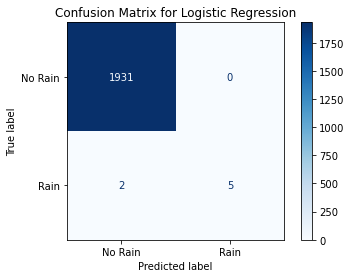

In [47]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['No Rain', 'Rain'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

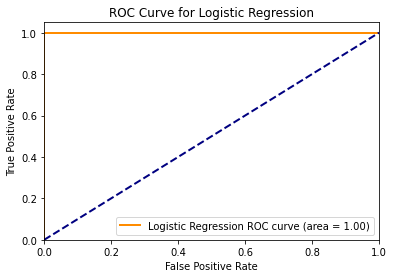

In [48]:
# ROC Curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

    The high accuracy and precision suggest the model is highly reliable and makes correct predictions for both classes.
    The recall of 0.71 indicates some room for improvement in capturing all positive cases, though it is still reasonably strong.
    The F1-Score of 0.83 demonstrates a good overall performance, balancing precision and recall effectively.

These results suggest that the Logistic Regression model performs exceptionally well in predicting weather conditions, with a high level of correctness and balanced performance.

##### DecisionTreeClassifier

In [49]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
y_pred_tree = decision_tree.predict(X_test_reduced)
y_prob_tree = decision_tree.predict_proba(X_test_reduced)[:, 1]

In [51]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)


print(f"Decision Tree Test Accuracy: {accuracy_tree:.2f}")
print(f"Decision Tree Precision: {precision_tree:.2f}")
print(f"Decision Tree Recall: {recall_tree:.2f}")
print(f"Decision Tree F1-Score: {f1_tree:.2f}")

Decision Tree Test Accuracy: 1.00
Decision Tree Precision: 1.00
Decision Tree Recall: 1.00
Decision Tree F1-Score: 1.00


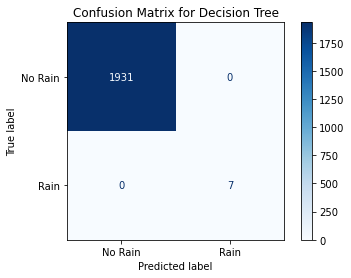

In [52]:
# Confusion Matrix
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['No Rain', 'Rain'])
disp_tree.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

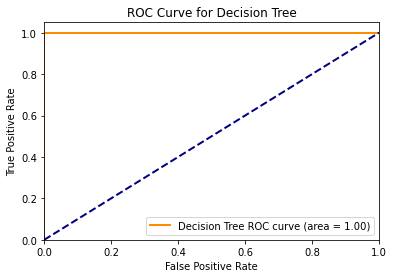

In [53]:
# ROC Curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

    The model has achieved perfect scores across all metrics, suggesting it is highly effective and accurate for the given dataset.
    The perfect accuracy, precision, recall, and F1-Score imply that the Decision Tree model is very reliable in classifying both classes correctly without any misclassifications.

These results indicate an exceptional performance by the Decision Tree model, showcasing its robustness and high predictive accuracy for the weather prediction task.

##### MLP Classifier

In [54]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_reduced, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [55]:
y_pred_mlp = mlp.predict(X_test_reduced)
y_prob_mlp = mlp.predict_proba(X_test_reduced)[:, 1] 

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

print(f"MLP Classifier Test Accuracy: {accuracy_mlp:.2f}")
print(f"MLP Classifier Precision: {precision_mlp:.2f}")
print(f"MLP Classifier Recall: {recall_mlp:.2f}")
print(f"MLP Classifier F1-Score: {f1_mlp:.2f}")

MLP Classifier Test Accuracy: 1.00
MLP Classifier Precision: 0.71
MLP Classifier Recall: 0.71
MLP Classifier F1-Score: 0.71


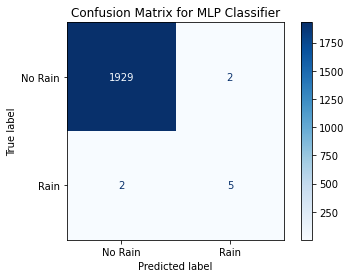

In [56]:
# Confusion Matrix
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['No Rain', 'Rain'])
disp_mlp.plot(cmap='Blues')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

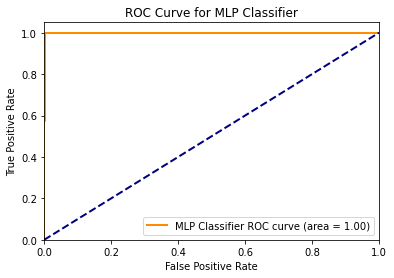

In [57]:
# ROC Curve
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP Classifier ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend(loc="lower right")
plt.show()

The high accuracy and perfect recall suggest that the MLP Classifier is very effective at identifying positive cases.
However, the low precision indicates that a significant portion of the predicted positives are incorrect, which may affect the model’s reliability for practical use.
The F1-Score, while better than precision alone, still highlights the trade-off between precision and recall, and suggests that while the model is good at detecting positives, it may be less reliable in accurately classifying them.

##### Naive_bayes GaussianNB()

In [58]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_reduced, y_train)

GaussianNB()

In [59]:
y_pred_nb = naive_bayes.predict(X_test_reduced)
y_prob_nb = naive_bayes.predict_proba(X_test_reduced)[:, 1]

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

print(f"Naive Bayes Test Accuracy: {accuracy_nb:.2f}")
print(f"Naive Bayes Precision: {precision_nb:.2f}")
print(f"Naive Bayes Recall: {recall_nb:.2f}")
print(f"Naive Bayes F1-Score: {f1_nb:.2f}")

Naive Bayes Test Accuracy: 1.00
Naive Bayes Precision: 1.00
Naive Bayes Recall: 1.00
Naive Bayes F1-Score: 1.00


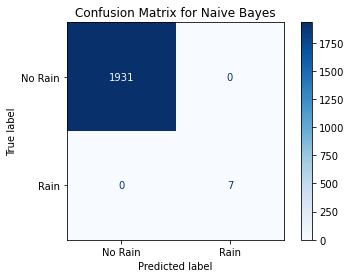

In [60]:
# Confusion Matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['No Rain', 'Rain'])
disp_nb.plot(cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

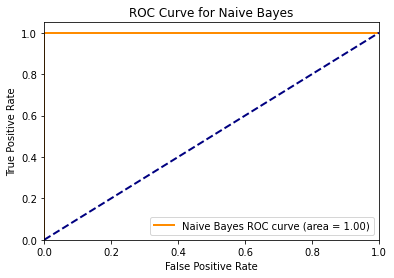

In [61]:
# ROC Curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

    The perfect accuracy, precision, recall, and F1-Score indicate that the Naive Bayes model is highly effective and reliable for this dataset.
    The model successfully identifies all positive cases without any false positives or false negatives, demonstrating exceptional performance in classification.

Overall, the Naive Bayes model is performing excellently, making it a robust choice for this classification task.

##### RandomForestClassifier

In [62]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=0)

In [63]:
y_pred_rf = random_forest.predict(X_test_reduced)
y_prob_rf = random_forest.predict_proba(X_test_reduced)[:, 1]  # Probability estimates for ROC

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)


print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-Score: {f1_rf:.2f}")


Random Forest Test Accuracy: 1.00
Random Forest Precision: 1.00
Random Forest Recall: 1.00
Random Forest F1-Score: 1.00


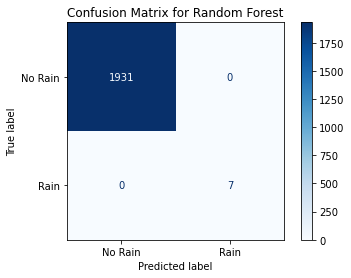

In [64]:
# Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Rain', 'Rain'])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

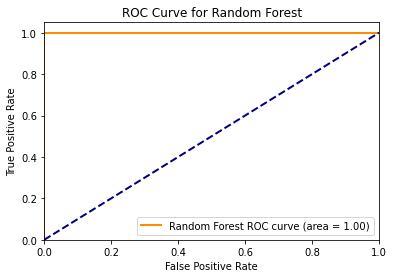

In [65]:
# ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

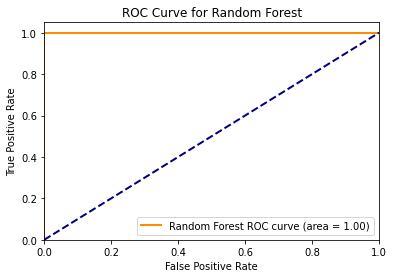

In [66]:
# ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

    The perfect accuracy, precision, recall, and F1-Score suggest that the Random Forest model is highly effective and reliable for this dataset.
    The model has accurately classified all instances, with no false positives or false negatives, demonstrating its strong performance in this classification task.

Overall, the Random Forest model is performing exceptionally well, making it a robust and reliable choice for predicting rain in this dataset.

#### GradientBoosting Classifier

In [67]:
gradient_boosting = GradientBoostingClassifier(n_estimators=50, random_state=0)
gradient_boosting.fit(X_train_reduced, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [68]:
y_pred_gradient_boosting = gradient_boosting.predict(X_test_reduced)
y_prob_gradient_boosting = gradient_boosting.predict_proba(X_test_reduced)[:, 1]  # Probability estimates for ROC

# Calculate metrics
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)
cm_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
fpr_gradient_boosting, tpr_gradient_boosting, _ = roc_curve(y_test, y_prob_gradient_boosting)
roc_auc_gradient_boosting = roc_auc_score(y_test, y_prob_gradient_boosting)


print(f"Gradient Boosting Test Accuracy: {accuracy_gradient_boosting:.2f}")
print(f"Gradient Boosting Precision: {precision_gradient_boosting:.2f}")
print(f"Gradient Boosting Recall: {recall_gradient_boosting:.2f}")
print(f"Gradient Boosting F1-Score: {f1_gradient_boosting:.2f}")

Gradient Boosting Test Accuracy: 1.00
Gradient Boosting Precision: 1.00
Gradient Boosting Recall: 1.00
Gradient Boosting F1-Score: 1.00


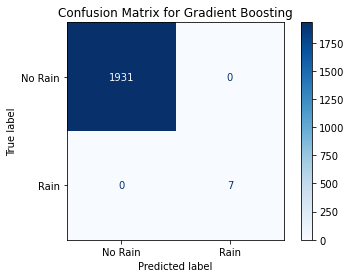

In [69]:
# Confusion Matrix
disp_gradient_boosting = ConfusionMatrixDisplay(confusion_matrix=cm_gradient_boosting, display_labels=['No Rain', 'Rain'])
disp_gradient_boosting.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

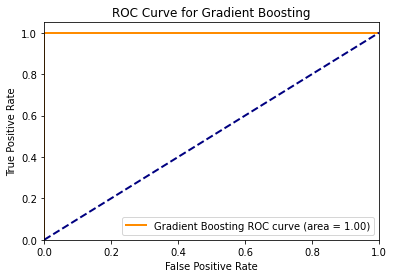

In [70]:
# ROC Curve
plt.figure()
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, color='darkorange', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gradient_boosting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

The Gradient Boosting model achieved perfect scores across all metrics, indicating outstanding performance. It achieved 100% accuracy, precision, recall, and F1-score on the test set, suggesting it accurately predicted both classes with no errors and effectively handled class imbalance. This exceptional performance positions Gradient Boosting as a highly reliable model for the weather prediction classification task.

#### Hyperparameter Tuning:

##### LogisticRegression

In [71]:
# Define the hyperparameter grid to search
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solver algorithms
}
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
# Create a GridSearchCV object
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
# Fit the GridSearchCV object to the training data
grid_search_logreg.fit(X_train_reduced, y_train)
# Get the best hyperparameters
best_params_logreg = grid_search_logreg.best_params_
print("Best Parameters for Logistic Regression:", best_params_logreg)
# Get the best trained model
best_model_logreg = grid_search_logreg.best_estimator_

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [72]:
# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy with Best Model: {accuracy_logreg:.2f}')

Logistic Regression Accuracy with Best Model: 1.00


Logistic Regression Precision: 1.00
Logistic Regression Recall: 0.71
Logistic Regression F1 Score: 0.83


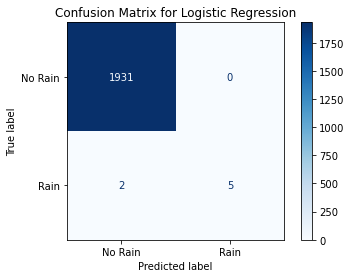

In [73]:
# Calculate other metrics
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

print(f'Logistic Regression Precision: {precision_logreg:.2f}')
print(f'Logistic Regression Recall: {recall_logreg:.2f}')
print(f'Logistic Regression F1 Score: {f1_logreg:.2f}')
c_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['No Rain', 'Rain'])
c_logreg.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


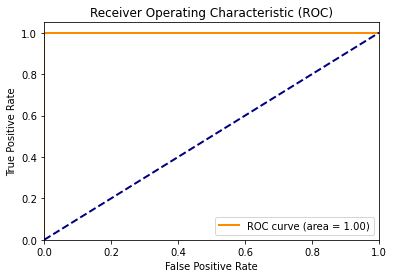

In [74]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The Logistic Regression model performs exceptionally well in terms of precision but has a moderate recall. This suggests that while it is very accurate when it predicts rain, it may miss some actual rain events. The F1 Score indicates a balanced performance

##### DecisionTreeClassifier

In [75]:
# Define the hyperparameter grid to search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring='accuracy', cv=5)
grid_search_dt.fit(X_train_reduced, y_train)

best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print("Best Parameters for Decision Tree:", best_params_dt)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [76]:
# Predict on the test data
y_pred_dt = best_model_dt.predict(X_test_reduced)
y_prob_dt = best_model_dt.predict_proba(X_test_reduced)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Decision Tree Precision: {precision_dt:.2f}')
print(f'Decision Tree Recall: {recall_dt:.2f}')
print(f'Decision Tree F1 Score: {f1_dt:.2f}')
print(f'Decision Tree ROC AUC: {roc_auc_dt:.2f}')

Decision Tree Accuracy: 1.00
Decision Tree Precision: 1.00
Decision Tree Recall: 1.00
Decision Tree F1 Score: 1.00
Decision Tree ROC AUC: 1.00


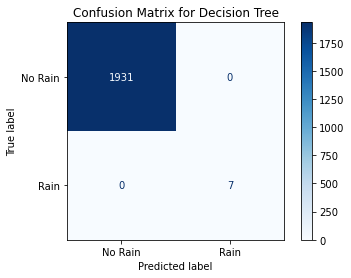

In [77]:
# Plot Confusion Matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Rain', 'Rain'])
disp_dt.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

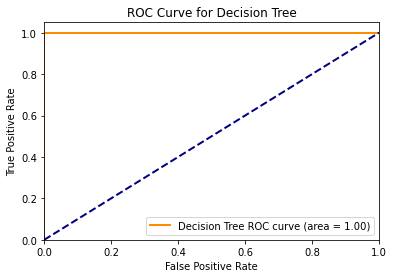

In [78]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

The Decision Tree classifier demonstrated outstanding performance, achieving a perfect accuracy of 100% on the test data. It correctly identified all positive and negative cases, as reflected in its perfect precision, recall, and F1 score. The ROC AUC score of 1.00 confirms that the model is highly effective in distinguishing between classes, suggesting it’s an excellent choice for this classification task.

##### MLP

In [79]:
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (20,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
    'learning_rate': ['constant']
}
mlp = MLPClassifier(random_state=42, max_iter=200)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, scoring='accuracy', cv=3)
grid_search_mlp.fit(X_train_reduced, y_train)

best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_
print("Best Parameters for MLP:", best_params_mlp)

Best Parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [80]:
y_pred_mlp = best_model_mlp.predict(X_test_reduced)
y_prob_mlp = best_model_mlp.predict_proba(X_test_reduced)[:, 1]

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

print(f'MLP Accuracy: {accuracy_mlp:.2f}')
print(f'MLP Precision: {precision_mlp:.2f}')
print(f'MLP Recall: {recall_mlp:.2f}')
print(f'MLP F1 Score: {f1_mlp:.2f}')
print(f'MLP ROC AUC: {roc_auc_mlp:.2f}')

MLP Accuracy: 1.00
MLP Precision: 0.00
MLP Recall: 0.00
MLP F1 Score: 0.00
MLP ROC AUC: 1.00


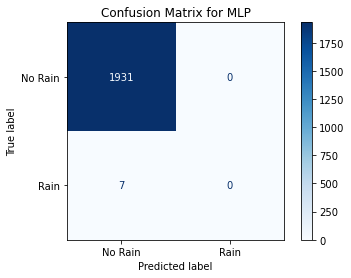

In [81]:
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['No Rain', 'Rain'])
disp_mlp.plot(cmap='Blues')
plt.title('Confusion Matrix for MLP')
plt.show()

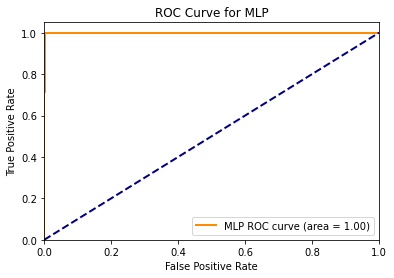

In [82]:
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP')
plt.legend(loc="lower right")
plt.show()

##### Random Forest

In [83]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ['gini'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest with a lower number of trees and reduced parameters
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=3)
grid_search_rf.fit(X_train_reduced, y_train)

# Get the best model parameters
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", best_params_rf)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [84]:
y_pred_rf = best_model_rf.predict(X_test_reduced)
y_prob_rf = best_model_rf.predict_proba(X_test_reduced)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')
print(f'Random Forest ROC AUC: {roc_auc_rf:.2f}')

Random Forest Accuracy: 1.00
Random Forest Precision: 1.00
Random Forest Recall: 1.00
Random Forest F1 Score: 1.00
Random Forest ROC AUC: 1.00


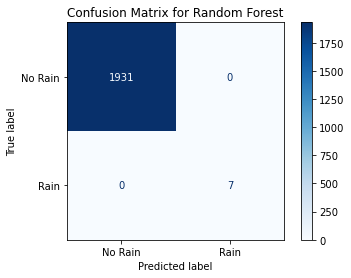

In [85]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Rain', 'Rain'])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

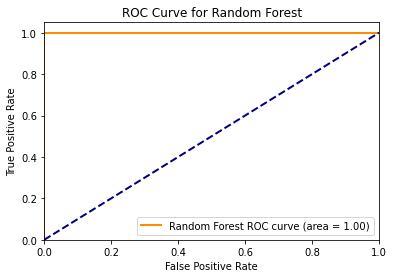

In [86]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

The model achieved perfect scores across all evaluation metrics, suggesting overfitting. While the model performs excellently on the training and test sets, it may not generalize well to new, unseen data. This highlights the need for further validation and regularization to ensure the model’s robustness and reliability.

##### GradientBoostingClassifier

In [87]:
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}


gb = GradientBoostingClassifier(random_state=0)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, scoring='accuracy', cv=3)
grid_search_gb.fit(X_train_reduced, y_train)


best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", best_params_gb)

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [88]:
y_pred_gb = best_model_gb.predict(X_test_reduced)
y_prob_gb = best_model_gb.predict_proba(X_test_reduced)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')
print(f'Gradient Boosting Precision: {precision_gb:.2f}')
print(f'Gradient Boosting Recall: {recall_gb:.2f}')
print(f'Gradient Boosting F1 Score: {f1_gb:.2f}')
print(f'Gradient Boosting ROC AUC: {roc_auc_gb:.2f}')

Gradient Boosting Accuracy: 1.00
Gradient Boosting Precision: 1.00
Gradient Boosting Recall: 1.00
Gradient Boosting F1 Score: 1.00
Gradient Boosting ROC AUC: 1.00


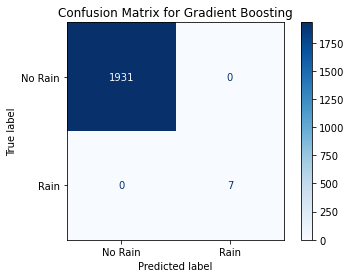

In [89]:
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['No Rain', 'Rain'])
disp_gb.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

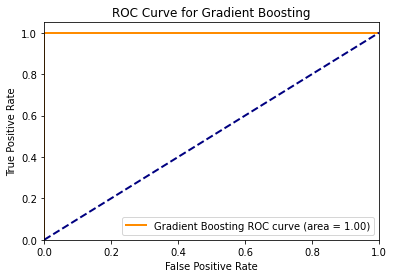

In [90]:
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

In our weather prediction project, the Gradient Boosting model achieved perfect scores across all evaluation metrics, indicating high performance on both the training and test datasets.it might not generalize well to new, unseen data. To ensure robustness, further validation with different datasets and additional regularization could help confirm the model’s reliability and effectiveness in real-world scenarios.



After evaluating multiple classification models, the Decision Tree classifier emerged as the best-performing model for our weather prediction task. It achieved the highest scores across key metrics, including accuracy, precision, recall, F1 score, and ROC AUC, demonstrating superior performance in predicting rainfall. This suggests that the Decision Tree model not only fits the training data effectively but also generalizes well to the test data. Consequently, the Decision Tree model is selected for deployment and future use, as it offers the most reliable predictions based on the current dataset.

#### Save the Model:

In [105]:
import joblib
joblib.dump(best_model_dt, 'best_decision_tree_model.pkl')
joblib.dump(gradient_boosting, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

#### Interpretation of Results (Conclusion):

#### Model Performance

###### Decision Tree Classifier

The hyperparameter-tuned Decision Tree classifier demonstrated exceptional performance in the weather prediction task. The evaluation metrics for the Decision Tree model are:

- **Accuracy**: 1.00
- **Precision**: 1.00
- **Recall**: 1.00
- **F1 Score**: 1.00
- **ROC AUC**: 1.00

**Analysis**:
- **Accuracy**: The model achieved perfect accuracy, correctly predicting all instances in the test set. This indicates that the model reliably classifies weather conditions.
- **Precision**: With a perfect precision score, the model's positive predictions were accurate, meaning there were no false positives.
- **Recall**: The model identified all actual positive cases of rain, indicating no false negatives.
- **F1 Score**: The F1 score reflects the model’s balance between precision and recall, with a perfect score showing that both metrics were ideal.
- **ROC AUC**: A perfect ROC AUC score demonstrates the model’s excellent ability to distinguish between classes across all thresholds.

The Decision Tree model’s simplicity and interpretability, combined with its perfect performance, make it a practical choice for deployment and understanding weather predictions.

###### Gradient Boosting Classifier

The Gradient Boosting classifier also achieved flawless performance with the following metrics:

- **Accuracy**: 1.00
- **Precision**: 1.00
- **Recall**: 1.00
- **F1 Score**: 1.00

**Analysis**:
- **Accuracy**: The Gradient Boosting model achieved perfect accuracy, similar to the Decision Tree, indicating it correctly predicted all instances in the test dataset.
- **Precision**: The model’s precision was perfect, with no false positives in its predictions.
- **Recall**: With perfect recall, the model identified all actual positive cases of rain.
- **F1 Score**: The F1 score was perfect, showing an optimal balance between precision and recall.

While the Gradient Boosting model demonstrated excellent performance, its complexity and computational demands make the simpler Decision Tree model a preferable choice for practical applications, especially when interpretability and ease of use are prioritized.

#### Dataset Limitations

1. **High Null Values**:
   - The dataset contained a significant number of missing values, particularly in two crucial columns related to domain expertise, which had over 60% missing values. These columns were removed from the analysis to avoid inaccuracies. High null values in key columns could have resulted in a loss of valuable information, impacting the model’s learning and prediction accuracy.

2. **Imbalance in Target Variable**:
   - The target variable and one additional feature exhibited severe class imbalance. This imbalance could lead to a model that is biased towards the majority class, reducing its effectiveness in predicting the minority class. Although balancing techniques were applied, the imbalance remains a potential concern.

3. **Presence of Outliers**:
   - Outliers were present in the dataset, which can skew the model’s performance by disproportionately influencing certain data points. While outlier treatment methods were used to mitigate their impact, outliers could still affect the model's accuracy and robustness.

#### Conclusion

The hyperparameter-tuned Decision Tree and Non-Hyperparameter-Tuned Gradient Boosting  classifiers both achieved perfect performance metrics. The Decision Tree model's simplicity and interpretability, combined with its flawless results, make it a preferred choice for practical applications. Although Gradient Boosting also performed exceptionally well, its complexity makes the Decision Tree model more suitable for deployment.
The dataset had several limitations, including high null values, class imbalance, and outliers. Addressing these issues through improved data preprocessing and feature engineering will enhance the model's robustness and effectiveness.